In [1]:
%load_ext autoreload
%autoreload 
%matplotlib inline

# Initialization in nn.Conv2D

In [2]:
import os
from IPython.display import Image

def cool_image(image, width = 500):    
    cwd = os.getcwd()
    img = Image(filename = cwd + "/cool_images/" + image, width=width)
    return img

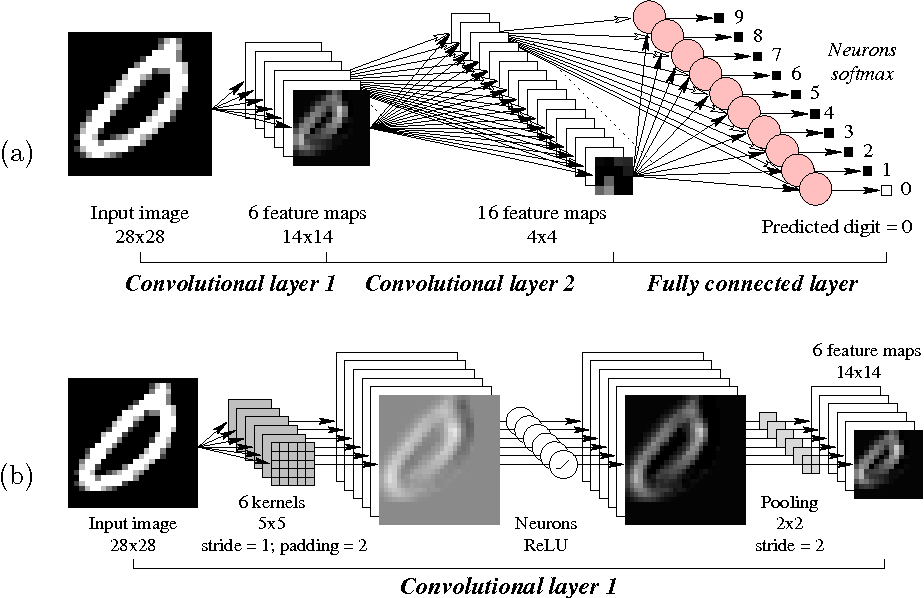

In [3]:
cool_image(image = 'conv_layer1.png', width = 500)

In [4]:
cwd = os.getcwd()
print("The current path is ", cwd)

The current path is  /Users/jameswatson/MyDocuments/ubuntumac/course-v3/nbs/dl2/trials


In [5]:
cwd_exp = '/'.join(cwd.split("/")[:-1]) + "/exp"
cwd_exp

'/Users/jameswatson/MyDocuments/ubuntumac/course-v3/nbs/dl2/exp'

In [6]:
#import sys 
#import os
#sys.path.append(os.path.abspath(cwd_exp))
# export 
from exp.nb_02 import *

In [7]:
def get_data():
    path = datasets.download_data(MNIST_URL, ext = ".gz")
    with gzip.open(path, "rb") as f:
        
        ((x_tr, y_tr), (x_val, y_val), rest_data) = pickle.load(f, encoding="latin")
        
        (x_tr, y_tr, x_val, y_val) = map(lambda x: torch.tensor(x), (x_tr, y_tr, x_val, y_val)) 
                    
    return (x_tr, y_tr, x_val, y_val)

In [8]:
def normalize(x, mean, std):
    return (x - mean)/std

In [9]:
def data_info(x, check = False):
    
    if check == True:
    
        d = {1: ["Mean", x.mean()], 2: ["St.Dev.", x.std()]}
                
        print("{:<8} {:<15} {:<10}".format("N",'Moment','Value'))
        
        for key, value in d.items():
            
            label, number = value[0], "{0:.4f}".format(value[1])
            
            print("{:<8} {:<15} {:<10}".format(key, label, number))
    
    return (x.mean(), x.std())

# Normalization

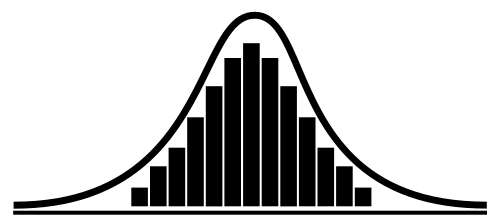

In [10]:
cool_image(image = "gauss1.png", width = 550)

In [11]:
(x_tr, y_tr, x_val, y_val) = get_data()
train_mean, train_std = data_info(x_tr)
x_tr = normalize(x_tr, train_mean, train_std)
x_val = normalize(x_val, train_mean, train_std)

In [12]:
data_info(x_tr)

(tensor(0.0001), tensor(1.))

In [13]:
data_info(x_val)

(tensor(-0.0057), tensor(0.9924))

In [14]:
x_tr.shape, x_val.shape

(torch.Size([50000, 784]), torch.Size([10000, 784]))

In [15]:
# testing torch reshaping function 
d = 4
L = d**2
a = torch.arange(1, L + 1)
a

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [16]:
# basically we want to create a rank 4 tensor as counter by the number of square brackets 
a = a.view(-1, 1, d, d)
print(a)
print(a.shape)

tensor([[[[ 1,  2,  3,  4],
          [ 5,  6,  7,  8],
          [ 9, 10, 11, 12],
          [13, 14, 15, 16]]]])
torch.Size([1, 1, 4, 4])


In [17]:
import math 
dim_x, dim_y = x_tr.shape
s = int(math.sqrt(dim_y))
dim_y, s 

(784, 28)

In [18]:
x_tr = x_tr.view(-1, 1, s, s)
x_val = x_val.view(-1, 1, s, s)

In [19]:
x_tr.shape, x_val.shape

(torch.Size([50000, 1, 28, 28]), torch.Size([10000, 1, 28, 28]))

In [20]:
n = x_tr.shape[0]
n

50000

In [21]:
c = (y_tr.max() - y_tr.min() + 1) 

In [22]:
nh = 32

In [23]:
n, c, nh 

(50000, tensor(10), 32)

In [25]:
##nn.Conv2d??
# nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, 
#padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')

Weight (Tensor): the learnable weights of the module of shape
                         $$(\text{out\_{channels}}, \frac{\text{in\_channels}}{\text{groups}},
                         \text{kernel\_size[0]}, \text{kernel\_size[1]}).$$
The values of these weights are sampled from
                         $$\mathcal{U}(-\sqrt{k}, \sqrt{k})$$ where
                         $$k = \frac{1}{C_\text{in} * \prod_{i=0}^{1}\text{kernel\_size}[i]}$$

In [26]:
layer1 = nn.Conv2d(in_channels=1, out_channels=nh, kernel_size=5)

In [27]:
# Setting a seed for the reproducability of the obtained results 
torch.manual_seed(37)
torch.randn(10)

tensor([-0.5394,  0.9952,  0.8913, -1.3254,  0.7554, -0.3414,  0.8735, -1.3742,
        -0.1651,  0.0071])

In [28]:
layer1.weight.shape, layer1.bias.shape

(torch.Size([32, 1, 5, 5]), torch.Size([32]))

In [29]:
data_info(layer1.weight, True)

N        Moment          Value     
1        Mean            -0.0052   
2        St.Dev.         0.1149    


(tensor(-0.0052, grad_fn=<MeanBackward0>),
 tensor(0.1149, grad_fn=<StdBackward0>))

In [30]:
data_info(layer1.bias, True)

N        Moment          Value     
1        Mean            -0.0454   
2        St.Dev.         0.1175    


(tensor(-0.0454, grad_fn=<MeanBackward0>),
 tensor(0.1175, grad_fn=<StdBackward0>))

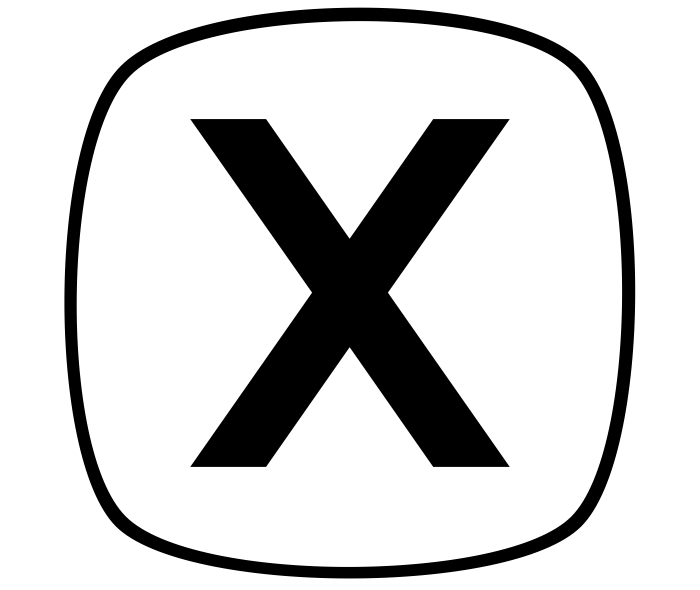

In [31]:
cool_image(image = 'x_letter1.png', width = 400)

In [32]:
x = x_val[:100]
x.shape

torch.Size([100, 1, 28, 28])

In [33]:
trans1 = layer1(x)

In [34]:
data_info(trans1, True)

N        Moment          Value     
1        Mean            -0.0585   
2        St.Dev.         0.5929    


(tensor(-0.0585, grad_fn=<MeanBackward0>),
 tensor(0.5929, grad_fn=<StdBackward0>))

In [35]:
trans1.shape

torch.Size([100, 32, 24, 24])

# Kernel size and its connection to the convolution output 

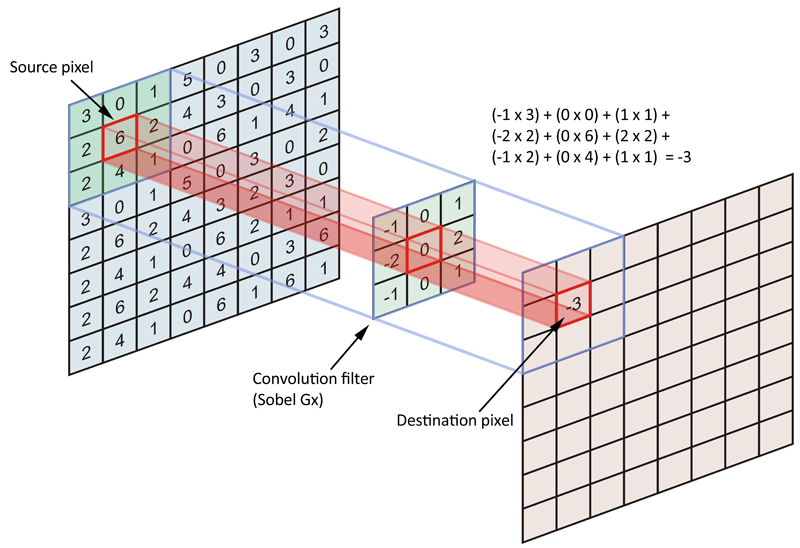

In [36]:
cool_image(image = "conv2.jpeg", width=400)

In [37]:
data_info(trans1, True)

N        Moment          Value     
1        Mean            -0.0585   
2        St.Dev.         0.5929    


(tensor(-0.0585, grad_fn=<MeanBackward0>),
 tensor(0.5929, grad_fn=<StdBackward0>))

In [38]:
# Here is the problem: standard deviation of the trans layer = 0.58 !=1 

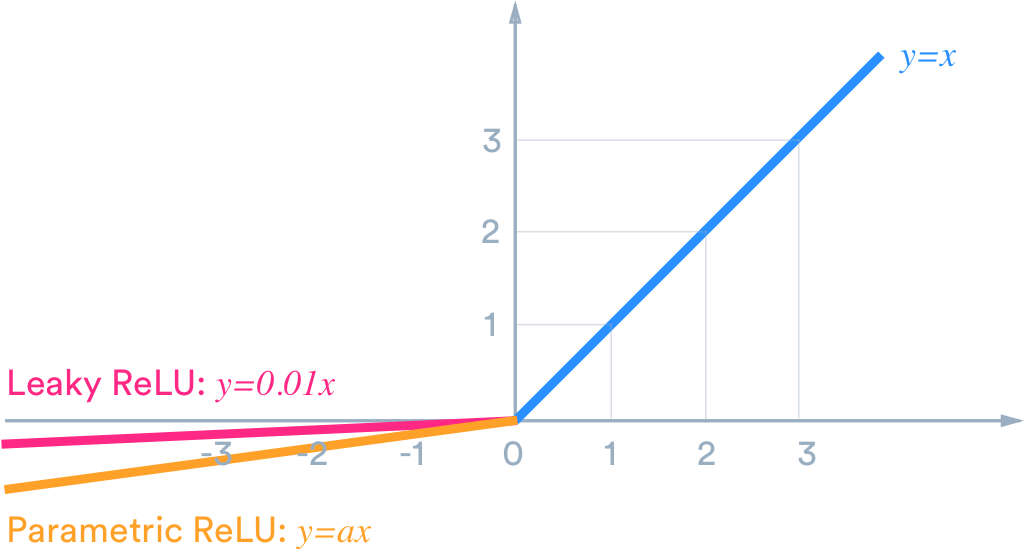

In [39]:
cool_image(image = "relu2.png", width=400)

In [40]:
init.kaiming_normal_(tensor = layer1.weight, a=0.0, mode='fan_in', nonlinearity='leaky_relu')
data_info(layer1(x), True)

N        Moment          Value     
1        Mean            -0.0405   
2        St.Dev.         1.7001    


(tensor(-0.0405, grad_fn=<MeanBackward0>),
 tensor(1.7001, grad_fn=<StdBackward0>))

In [41]:
init.kaiming_normal_(layer1.weight, a=1.0)
data_info(layer1(x))

(tensor(-0.0432, grad_fn=<MeanBackward0>),
 tensor(1.0332, grad_fn=<StdBackward0>))

In [42]:
# leak = a = 1.0 i.e. no leak 
init.kaiming_normal_(layer1.weight, a=1.0)
data_info(layer1(x))

(tensor(-0.0284, grad_fn=<MeanBackward0>),
 tensor(1.1604, grad_fn=<StdBackward0>))

In [43]:
import torch.nn.functional as F

$$
\text{LeakyReLU}(x) = \max(0, x) + \text{negative\_slope} * \min(0, x)
$$

In [44]:
def func1(inp, a = 0.0):
    
    return F.leaky_relu(input = layer1(inp), negative_slope=a, inplace=False)


In [45]:
data_info(func1(x , a = 1.0),True)

N        Moment          Value     
1        Mean            -0.0284   
2        St.Dev.         1.1604    


(tensor(-0.0284, grad_fn=<MeanBackward0>),
 tensor(1.1604, grad_fn=<StdBackward0>))

In [46]:
init.kaiming_normal_(layer1.weight, a = 0.0)
data_info(func1(x))

(tensor(0.4708, grad_fn=<MeanBackward0>),
 tensor(0.8296, grad_fn=<StdBackward0>))

In [47]:
# trying again 

In [48]:
layer1 = nn.Conv2d(in_channels = 1, out_channels = 32 , kernel_size = 5)

In [49]:
data_info(func1(x))

(tensor(0.2192, grad_fn=<MeanBackward0>),
 tensor(0.3267, grad_fn=<StdBackward0>))

In [50]:
# receptife field size
rec_fs = layer1.weight[0].numel()
# number of elements in a tensor =numel()

In [51]:
nf, ni, *_ = layer1.weight.shape
nf, ni

(32, 1)

In [52]:
fan_in = ni * rec_fs
fan_out = nf * rec_fs
fan_in, fan_out

(25, 800)

In [53]:
##init.kaiming_normal_??

##init.kaiming_normal_??
$$
\text{std} = \sqrt{\frac{2}{(1 + a^2) \times \text{fan\_in}}}
$$

In [54]:
import math 
def gain(a, *args):
    
    g_arr = []
    
    g_arr.append([a, math.sqrt(2.0/(1 + a**2))])
    
    for elem in args:
    
        g_arr.append([elem, math.sqrt(2.0/(1 + elem**2))])
    
    return g_arr

In [55]:
# question: what about 1/fan_in???

In [56]:
gain(1)[0][-1]

1.0

In [57]:
gain(1, 0, 10**-1, 10**-2, 10**-3, math.sqrt(5))

[[1, 1.0],
 [0, 1.4142135623730951],
 [0.1, 1.4071950894605838],
 [0.01, 1.4141428569978354],
 [0.001, 1.4142128552668443],
 [2.23606797749979, 0.5773502691896257]]

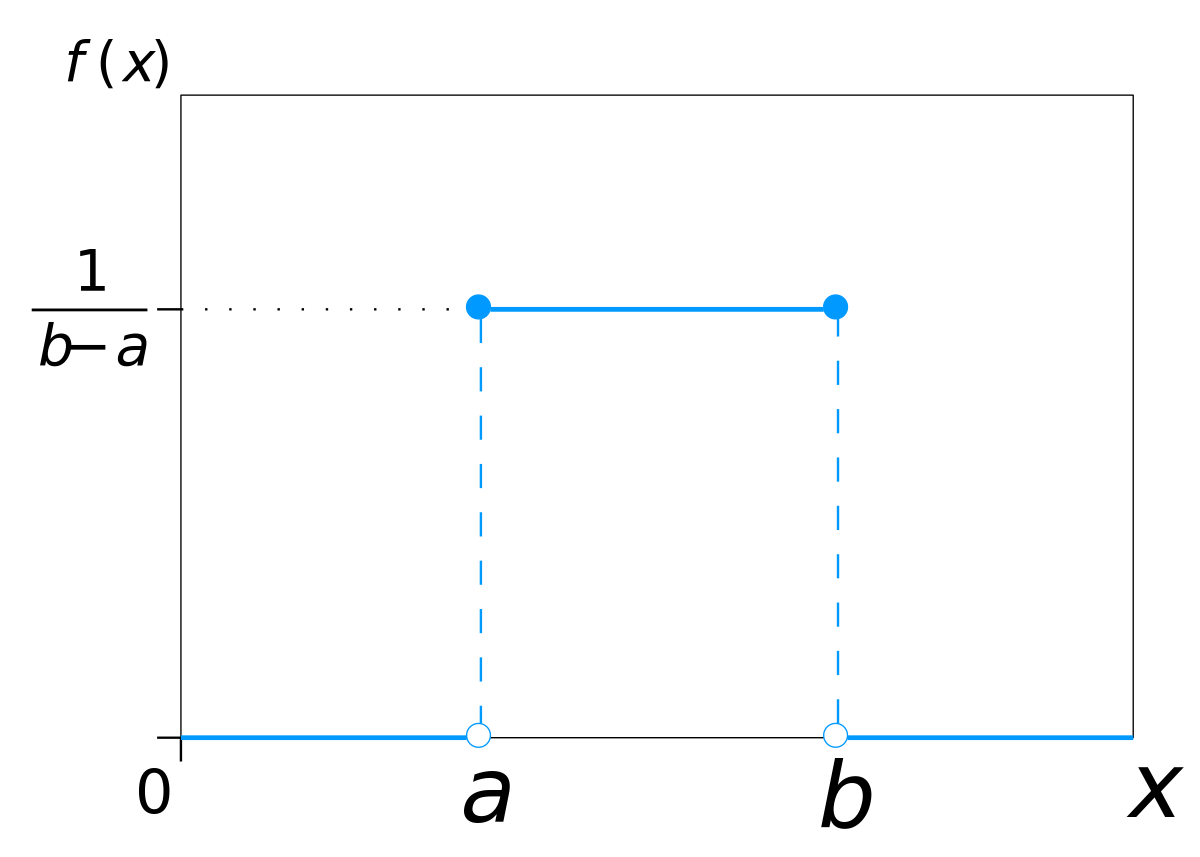

In [58]:
cool_image(image = "uniform1.png", width=400)

\begin{align}
a &= 1 \\
b &= -1 \\
E(X) &= \frac{a+b}{2} = 0\\
E(X^2) & = \frac{a^2 + ab + b^2}{3} = \frac{1}{3}\\
V(X) &= \frac{(b-a)^{2}}{12} = \frac{4}{12} = \frac{1}{3}\\
\sigma &= \sqrt{\frac{1}{3}}
\end{align}

In [59]:
math.sqrt(1/3)
# which is exactly 

0.5773502691896257

In [60]:
#torch.nn.modules.conv._ConvNd.reset_parameters??
# the key thing is that we use kaiming_unform 
# init.kaiming_uniform_(self.weight, a=math.sqrt(5))

\begin{equation}
\sigma_{\text{uniform}} = \sqrt{\frac13} = \sqrt{\frac{2}{1+a^2}}\\
a = \sqrt{5} \hspace{5mm} \blacksquare
\end{equation}

In [61]:
def kaiming_hand(inp, a = 0.0, check = False):
    
    nf, ni, *_ = inp.shape
    
    rec_fs = inp[0].numel()
    
    fan_in = ni * rec_fs
    
    fan_out = nf * rec_fs
    
    fan = fan_in if not check else fan_out
    
    print("The fan is", fan)
    
    print("The gain is", gain(a)[0][-1])
    
    std = gain(a)[0][-1] * math.sqrt(1.0/fan)
    
    bound = math.sqrt(3.0) * std
    
    inp.data.uniform_(-bound, bound)
    
    #return res
    

In [62]:
kaiming_hand(layer1.weight, a = 0.0)
data_info(func1(x))

The fan is 25
The gain is 1.4142135623730951


(tensor(0.5941, grad_fn=<MeanBackward0>),
 tensor(1.2271, grad_fn=<StdBackward0>))

In [63]:
kaiming_hand(layer1.weight, a = math.sqrt(5.0))
data_info(func1(x))

The fan is 25
The gain is 0.5773502691896257


(tensor(0.2105, grad_fn=<MeanBackward0>),
 tensor(0.3570, grad_fn=<StdBackward0>))

## What the hell does it mean, man?!

In [64]:
class Flatten(nn.Module):
    def forward(self, x):
        return x.view(-1)

In [65]:
#model = nn.Sequential(
#               nn.Conv2d(1,20,5),
#               nn.ReLU(),
#               nn.Conv2d(20,64,5),
#               nn.ReLU()
#             )

In [66]:
# layer = nn.Conv2d(in_channels, out_channels, kernel_size, 
#                   stride=1, padding=0, dilation=1, 
#                   groups=1, bias=True, padding_mode='zeros')

In [69]:
##nn.AdaptiveAvgPool2d??

In [98]:
model = nn.Sequential(
        nn.Conv2d(in_channels = 1, out_channels = 8, kernel_size= 5, stride = 2, padding = 2),
        nn.ReLU(),
        nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = 3, stride = 2, padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = 16, out_channels= 32, kernel_size = 3, stride= 2, padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels= 32, out_channels= 1, kernel_size= 3, stride=2 , padding = 1),
        nn.AdaptiveAvgPool2d(1),
        Flatten()
)

In [99]:
y = y_val[:100].float()

In [100]:
y

tensor([3., 8., 6., 9., 6., 4., 5., 3., 8., 4., 5., 2., 3., 8., 4., 8., 1., 5.,
        0., 5., 9., 7., 4., 1., 0., 3., 0., 6., 2., 9., 9., 4., 1., 3., 6., 8.,
        0., 7., 7., 6., 8., 9., 0., 3., 8., 3., 7., 7., 8., 4., 4., 1., 2., 9.,
        8., 1., 1., 0., 6., 6., 5., 0., 1., 1., 7., 2., 7., 3., 1., 4., 0., 5.,
        0., 6., 8., 7., 6., 8., 9., 9., 4., 0., 6., 1., 9., 2., 6., 3., 9., 4.,
        4., 5., 6., 6., 1., 7., 2., 8., 6., 9.])

In [101]:
trans1 = model(x_val[:100])

In [102]:
data_info(trans1, True)

N        Moment          Value     
1        Mean            0.0671    
2        St.Dev.         0.0106    


(tensor(0.0671, grad_fn=<MeanBackward0>),
 tensor(0.0106, grad_fn=<StdBackward0>))

In [103]:
l = mse(trans1, y)
l.backward()

In [104]:
l

tensor(30.0737, grad_fn=<MeanBackward0>)

In [105]:
data_info(model[0].weight.grad)

(tensor(-0.0195), tensor(0.0367))

In [106]:
for kk, layer in enumerate(model):
    print(kk, layer)
    print("-"*70)

0 Conv2d(1, 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
----------------------------------------------------------------------
1 ReLU()
----------------------------------------------------------------------
2 Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
----------------------------------------------------------------------
3 ReLU()
----------------------------------------------------------------------
4 Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
----------------------------------------------------------------------
5 ReLU()
----------------------------------------------------------------------
6 Conv2d(32, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
----------------------------------------------------------------------
7 AdaptiveAvgPool2d(output_size=1)
----------------------------------------------------------------------
8 Flatten()
----------------------------------------------------------------------


In [107]:
isinstance(model[0],nn.Conv2d)

True

In [108]:
for layer in enumerate(model):
    if isinstance(layer, nn.Conv2d):
        init.kaiming_uniform_(layer.weight)
        layer.bias.data.zero_()

In [109]:
trans2 = model(x_val[:100])

In [112]:
data_info(trans2)

(tensor(0.0671, grad_fn=<MeanBackward0>),
 tensor(0.0106, grad_fn=<StdBackward0>))

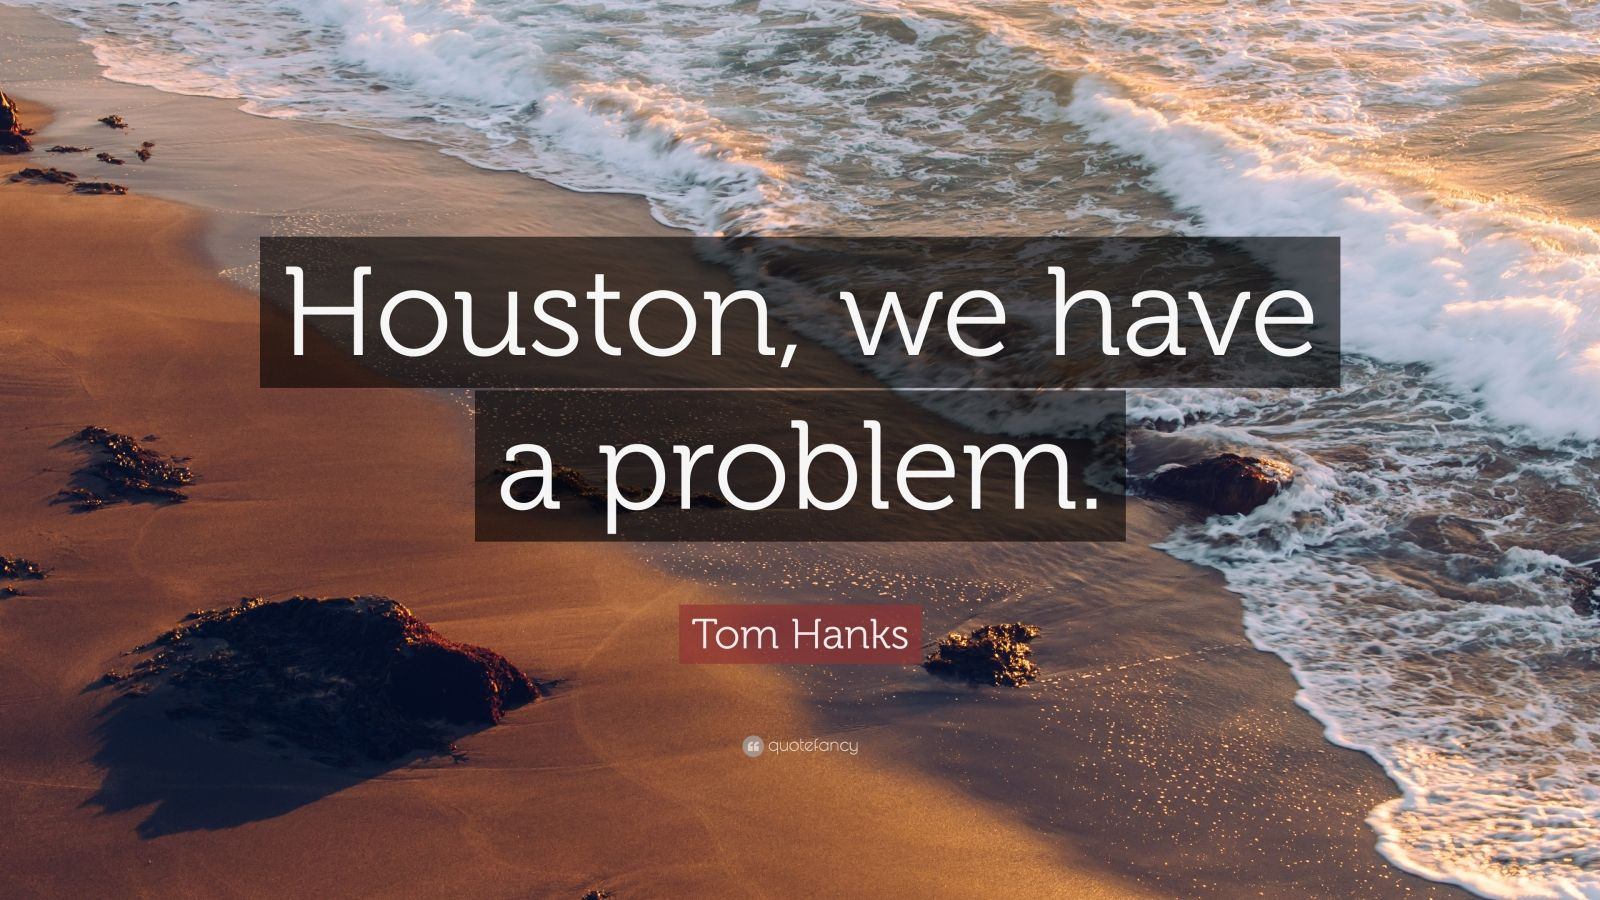

In [114]:
cool_image(image = "problem1.jpg", width=500)

In [111]:
## what is the differnce between 
# for layer in model: ->std ~ tensor(0.2465)
# vs 
# for layer in enumerate(model): -> std ~ tensor(0.0106)